In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('supershops.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [7]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [10]:
x = df.drop(['Profit','Area'],axis = 1)

In [11]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [12]:
y = df[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= .25, random_state=1)

In [14]:
xtrain.shape

(36, 3)

In [15]:
df2= df.copy()

In [16]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [17]:
df= df.drop(['Area'], axis=1)


In [18]:
df.corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.937853
Administration,0.227141,1.000000,0.009534,0.197201
Transport,0.718574,0.009534,1.000000,0.782578
Profit,0.937853,0.197201,0.782578,1.000000


In [19]:
model = LinearRegression()
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(xtest)

In [21]:
y_pred

array([[102261.93285764],
       [ 94022.18461685],
       [ 83380.55446333],
       [ 53860.93839028],
       [175522.75174473],
       [169115.44639511],
       [ 62002.18053191],
       [ 92549.5516028 ],
       [ 81576.26711296],
       [ 94309.09718491],
       [ 89411.31648828],
       [ 86530.84142066],
       [122394.58800526]])

In [22]:
xtest.head()

,Marketing Spend,Administration,Transport
28,66051.52,182645.56,118148.20
35,46014.02,85047.44,205517.64
40,28754.33,118546.05,172795.67
49,0.00,116983.80,45173.06
2,153441.51,101145.55,407934.54


In [23]:
model.coef_

array([[0.54587641, 0.0685643 , 0.10747462]])

In [24]:
model.intercept_

array([40985.06901268])

In [25]:
model.predict([[28754.33,118546.05,172795.67]])

array([[83380.55446333]])

In [26]:
ytest.head()

,Profit
28,103282.38
35,96479.51
40,78239.91
49,14681.40
2,191050.39


In [27]:
model.predict(xtest)

array([[102261.93285764],
       [ 94022.18461685],
       [ 83380.55446333],
       [ 53860.93839028],
       [175522.75174473],
       [169115.44639511],
       [ 62002.18053191],
       [ 92549.5516028 ],
       [ 81576.26711296],
       [ 94309.09718491],
       [ 89411.31648828],
       [ 86530.84142066],
       [122394.58800526]])

In [28]:
ytest

,Profit
28,103282.38
35,96479.51
40,78239.91
49,14681.40
2,191050.39
3,182901.99
43,69758.98
30,99937.59
46,49490.75
31,97483.56


In [29]:
mse= mean_squared_error(ytest,y_pred)

In [30]:
print('MSE:', mse)

MSE: 261064330.7083245


In [31]:
model.score(xtest,ytest)

0.8734848930927087

In [32]:
model.score(xtrain,ytrain)

0.8985205926123356

# Polynomial

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [35]:
ploy = PolynomialFeatures(degree=2)
x_ploy = ploy.fit_transform(x)

In [36]:
pd.DataFrame(x_ploy).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11


In [37]:
xtrain, xtest, ytrain, ytest =train_test_split(x_ploy,y,test_size = 0.25, random_state=0)

In [38]:
xtrain.shape

(36, 10)

In [39]:
model2 = LinearRegression()
model2.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred2 = model2.predict(xtest)

In [41]:
y_pred2

array([[101606.42693139],
       [164653.76827081],
       [131119.04611133],
       [104593.86990863],
       [ 99609.91567182],
       [ 68898.23379345],
       [ 92076.3708765 ],
       [ 72287.07988902],
       [154325.98721884],
       [128236.41897846],
       [128001.27841917],
       [110500.67879296],
       [ 76394.97788881]])

In [42]:
ytest


,Profit
30,99937.59
4,166187.94
27,105008.31
31,97483.56
33,96778.92
38,81229.06
35,96479.51
41,77798.83
7,155752.60
10,146121.95


In [43]:
model2.score(xtest,ytest)


0.7982373504759039

In [44]:
mse = mean_squared_error(ytest,y_pred2)
print(mse)


162866427.11254364


In [46]:
model2.score(xtrain,ytrain)

0.9505396347868061

# degree 3

In [50]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [51]:
poly = PolynomialFeatures(degree=4)

In [52]:
x_poly_dg3 =poly.fit_transform(x)

In [53]:
pd.DataFrame(x_poly_dg3).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11,...,2.919286e+21,2.938221e+20,1.012584e+21,3.489620e+21,1.202610e+22,3.512254e+20,1.210411e+21,4.171378e+21,1.437561e+22,4.954196e+22
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11,...,5.209502e+21,5.640260e+20,1.653946e+21,4.850019e+21,1.422216e+22,5.251052e+20,1.539815e+21,4.515341e+21,1.324075e+22,3.882709e+22
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11,...,3.918020e+21,1.587754e+20,6.403640e+20,2.582680e+21,1.041632e+22,1.046615e+20,4.221150e+20,1.702451e+21,6.866228e+21,2.769248e+22
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11,...,3.060684e+21,2.412833e+20,7.791206e+20,2.515834e+21,8.123804e+21,1.983311e+20,6.404249e+20,2.067976e+21,6.677639e+21,2.156256e+22
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11,...,2.707664e+21,1.084770e+20,4.346219e+20,1.741347e+21,6.976847e+21,6.976351e+19,2.795131e+20,1.119892e+21,4.486935e+21,1.797726e+22


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly_dg3,y, test_size=.25,random_state=0)

In [58]:
xtrain.shape

(36, 35)

In [60]:
model3=LinearRegression()
model3.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
y_pred3 = model3.predict(xtest)
y_pred3

array([[ 70958.93089651],
       [129351.57802787],
       [137334.18438896],
       [101359.48374003],
       [111357.46103086],
       [-30235.49643701],
       [ 92066.03171598],
       [ 61875.85304243],
       [152198.55837762],
       [144062.31509239],
       [119820.68411148],
       [ 91844.4968738 ],
       [ 96454.26829987]])

In [63]:
ytest.head()

,Profit
30,99937.59
4,166187.94
27,105008.31
31,97483.56
33,96778.92


In [68]:
model3.score(xtest,ytest)

-0.6020772440600266

In [69]:
model3.score(xtrain,ytrain)

0.9959115411600074

In [70]:
mse = mean_squared_error(ytest,y_pred3)
print(mse)

1293225467.2201133


# make Pipeline

In [71]:
from sklearn.pipeline import make_pipeline

In [72]:
pipeline = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

In [73]:
pipeline.fit(x,y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,4
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [74]:
pipeline.predict(x)[0]

array([191459.90259725])

In [76]:
pipeline.predict([[162597.70,	151377.59,	443898.53]])

array([[194396.34645931]])

# break pipline

In [77]:
max = poly.transform([[162597.70,	151377.59,	443898.53]])

In [78]:
max

array([[1.00000000e+00, 1.62597700e+05, 1.51377590e+05, 4.43898530e+05,
        2.64380120e+10, 2.46136480e+10, 7.21768800e+10, 2.29151748e+10,
        6.71962897e+10, 1.97045905e+11, 4.29875995e+15, 4.00212255e+15,
        1.17357947e+16, 3.72595471e+15, 1.09259621e+16, 3.20392109e+16,
        3.46884393e+15, 1.01720124e+16, 2.98283342e+16, 8.74683875e+16,
        6.98968481e+20, 6.50735921e+20, 1.90821322e+21, 6.05831666e+20,
        1.77653632e+21, 5.20950201e+21, 5.64026044e+20, 1.65394582e+21,
        4.85001854e+21, 1.42221586e+22, 5.25105234e+20, 1.53981472e+21,
        4.51534135e+21, 1.32407537e+22, 3.88270887e+22]])

In [80]:
max_p=model3.predict(max)

In [81]:
max_p

array([[192527.94067551]])

In [82]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# let's talk about Regularization

In [83]:
df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [84]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [85]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25,random_state=0)

In [87]:
xtrain.head()

,Marketing Spend,Administration,Transport
28,66051.52,182645.56,118148.20
49,0.00,116983.80,45173.06
2,153441.51,101145.55,407934.54
47,0.00,135426.92,0.00
18,91749.16,114175.79,294919.57


In [88]:
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [89]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [90]:
lasso_pred=lasso_model.predict(xtest)
lasso_pred

array([ 90707.18530496, 166377.24286744, 124018.59719352,  93252.51800456,
        97588.41925083,  68948.39249336,  89037.14298582,  73472.98071108,
       159657.23911634, 129149.84630102, 128674.69783297,  88409.43005012,
        96436.1880913 ])

In [91]:
ytest

,Profit
30,99937.59
4,166187.94
27,105008.31
31,97483.56
33,96778.92
38,81229.06
35,96479.51
41,77798.83
7,155752.60
10,146121.95


In [92]:
lesso_mse = mean_squared_error(ytest, lasso_pred)
print(lesso_mse)

101360808.35784714


In [93]:
rid_pred =ridge_model.predict(xtest)
rid_mse = mean_squared_error(ytest,rid_pred)
print(rid_mse)

101360809.2887234


In [96]:
lesso_score = lasso_model.score(xtest,ytest)
lesso_score

0.8744319156823432

In [97]:
ridge_score = ridge_model.score(xtest,ytest)

In [98]:
ridge_score

0.8744319145291525

In [99]:
scores = [lesso_score,ridge_score]
models = ['Lasso','Ridge']

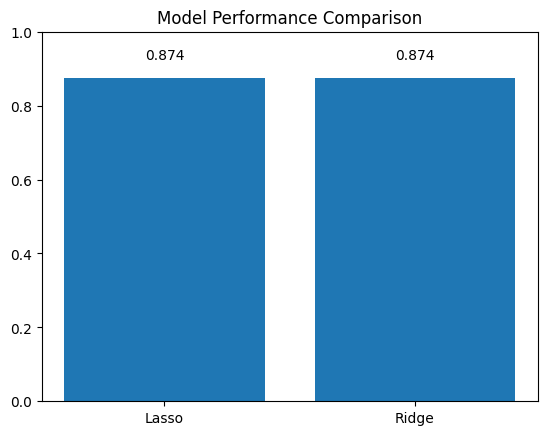

In [107]:
for i, score in enumerate(scores):
    plt.text(i, score+.05,f'{score:.3f}', ha = 'center')
plt.bar(models, scores)
plt.title('Model Performance Comparison')
plt.ylim(0,1)
plt.show()